In [1]:
import tempfile
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from PIL import Image
from skimage import io
from transformers import AutoModelForImageTextToText, AutoProcessor

from llama.data_formats import image_with_labels
from llama.pylib import image_slice

In [2]:
image_dir = Path("../data/lightning_bug/Transcribed_Labels/00000XXXX/0000000XX")

In [3]:
image_paths = sorted(image_dir.glob("*.jpg"))

In [4]:
def one_up(output_image: Image) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(16, 16))

    ax.imshow(output_image, cmap=plt.cm.gray)
    # ax.set_title(output_title)
    ax.axis("off")

    plt.show()

In [5]:
image = io.imread(image_paths[0], as_gray=True)
image.shape

(6996, 2999)

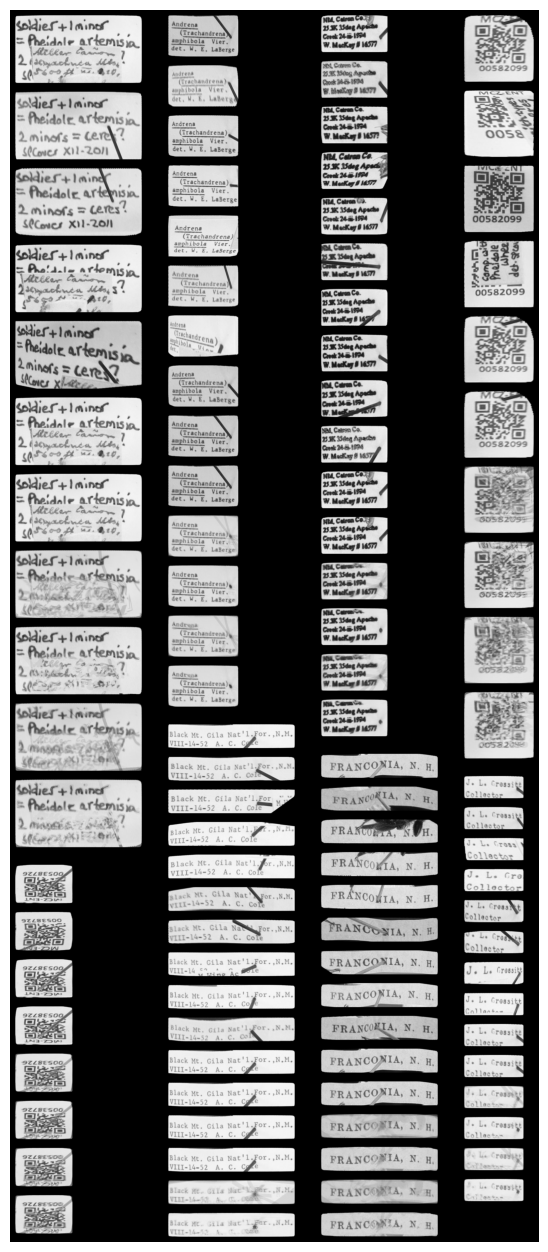

In [12]:
one_up(image)

In [7]:
strips = image_slice.get_image_columns(image)
len(strips)

4

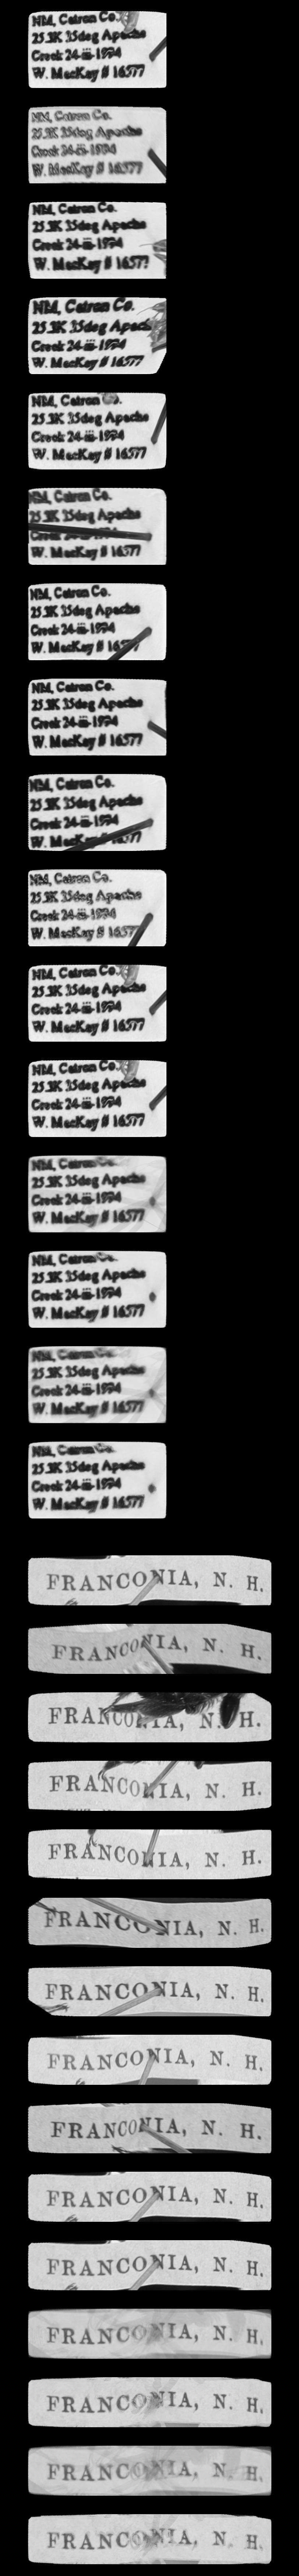

In [21]:
s = strips[2]
s.as_image()

In [9]:
areas = []
for s in strips:
    areas += image_slice.get_image_areas(image, s)

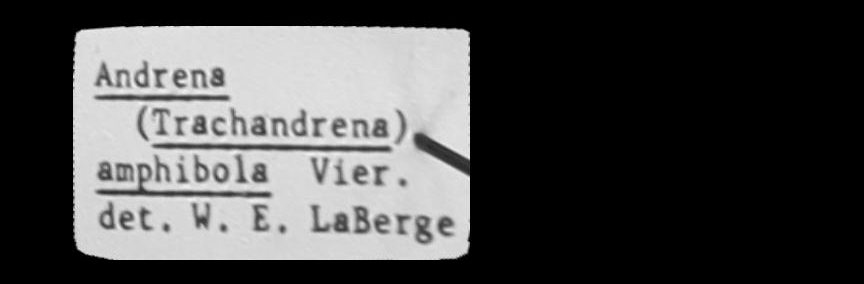

In [13]:
a = areas[21]
a.as_image()

In [14]:
model_id = "allenai/olmOCR-7B-0825"
processor = AutoProcessor.from_pretrained(model_id)
model = (
    AutoModelForImageTextToText.from_pretrained(model_id, torch_dtype=torch.float16)
    .to("cuda")
    .eval()
)

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
labels = []
for area in areas:
    with tempfile.NamedTemporaryFile(suffix=".jpg") as f:
        area.as_image().save(f.name)
        messages = [
            {
                "role": "user",
                "content": [
                    {
                        "type": "image",
                        "image": f.name,
                    },
                    {"type": "text", "text": image_with_labels.PROMPT},
                ],
            }
        ]
        text = processor.apply_chat_template(
            messages, tokenize=False, add_generation_prompt=True
        )
        inputs = processor.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=True,
            return_dict=True,
            return_tensors="pt",
        ).to(model.device)

        output_ids = model.generate(**inputs, max_new_tokens=10_000)
        generated_ids = [
            output_ids[len(input_ids) :]
            for input_ids, output_ids in zip(inputs.input_ids, output_ids, strict=False)
        ]
        output_text = processor.batch_decode(
            generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
        )
        for text in output_text:
            print("=" * 80)
            print(text)
            labels.append(text)

soldier + minor
= Pheidole artemisia

Atibler Canyon?

2135000 $4.00
soldier + 1 minor = Pheidole artemisia
2 minors = Ceres?
SCCovex XII-2011
soldier + 1 minor = Pheidole artemisia
2 minors = Ceres?
SCover XII-2011
soldiers + 1 minor
= Phaidale artemisia

Atelier Canon
250 x 100 mm
5650 N
soldier + 1 minor = Pheidole artemisia
2 minors = Ceres?
SPCovex X
soldiers + 1 minor
= Pheidole artemisia

Albiter Canon?
21 25000 $ 10000 $ 10
soldier + minor
= Pheidole artemisia

Atibler tanion?
2 (2) x 1000 = 2000
soldiers + 1 minor
= Phaidole artemisia
2 individuals total
MCS = 01/2019
soldier + 1 minor
= Pheidole artemisia
2 minors?
soldiers + 1 minor
= Pheidole artemisia
2 minors 7 eggs?
SICCA XIF-1014
soldier + 1 minor = Pheidole artemisia
2 minors = 2 adults?
SLEEP DEPRIVATION
00538726
MCZ-ENT
00538726
00538726
MCC-ENT
00538726
MCC-ENT
00538726
00538726
00538726
00538726
Andrena
(Trachandrena)
amphibola Vier.
det. W. E. LaBerge
Andrena
(Trachandrena)
amphibola Vier.
det. W. E. LaBerge
Andre